In [1]:
import numpy as np
import pandas as pd 
import glob
from matplotlib import pyplot as plt
from tqdm import tqdm
import cv2 as cv
from cgan.cgan import GAN
import tensorflow as tf
import tensorflow.keras as keras

/Users/karladsj/Documents/Semestre I/Vision Computacional/GAN_Caras_Emociones/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Cargamos los datos de entrenamiento

Distribución de los datos:

- Angry - 3995
- Disgust - 436
- Fear - 4097
- Happy - 7215
- Neutral - 4965
- Sad - 4830
- Surprise - 3171

Podemos notar que tenemos muy pocas imágenes de disgusto

In [2]:
def load_images(images):
    """
    Carga las imagenes y las convierte en un dataframe, 
    cada imagen con su etiqueta de sentimiento correspondiente
    """
    types = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3,'neutral': 4, 'sad': 5, 'surprise': 6}
    data = {'label': [], 'img': [], 'type': []} 

    for image in tqdm(images):
        name = image.split('/')[2]
        data['label'].append(name)
        data['type'].append(types[name])
        img = cv.imread(image,cv.IMREAD_GRAYSCALE)
        img = img.astype(np.float32) / 255 # Normalizamos los valores rgb
        data['img'].append(img)
    return pd.DataFrame(data)

In [3]:
url = glob.glob('data/train/**/*')
images = load_images(url)

100%|██████████| 28709/28709 [00:04<00:00, 6865.63it/s]


In [4]:
def display_img(i, imgs):
    """Despliega 25 imagenes apartir de i"""
    plt.figure(1, figsize=(5,5))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(imgs.iloc[i]['img'], cmap='gray')
        plt.axis('off')
    plt.show()

def display_emotion(name):
    """Toma las caras con cierta emoción y muestra 25"""
    emotion = images[images['label'] == name]
    print(f'{name}: ',len(emotion))
    display_img(1, emotion)

fear:  4097


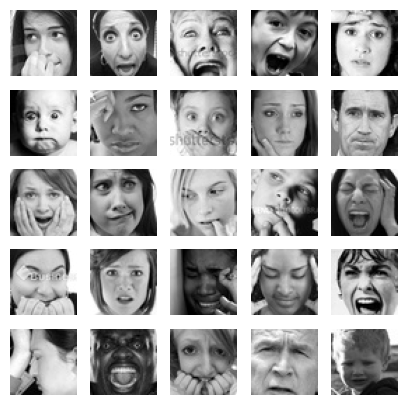

In [5]:
display_emotion('fear')

angry:  3995


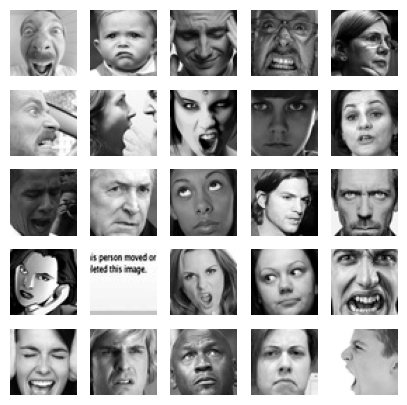

In [6]:
display_emotion('angry')

disgust:  436


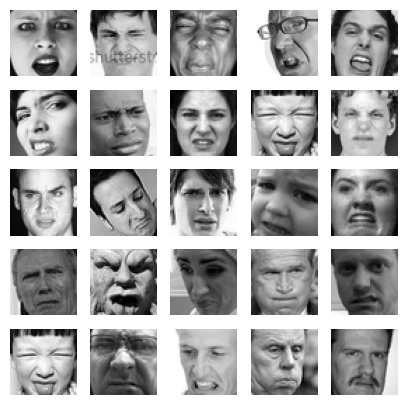

In [7]:
display_emotion('disgust')

happy:  7215


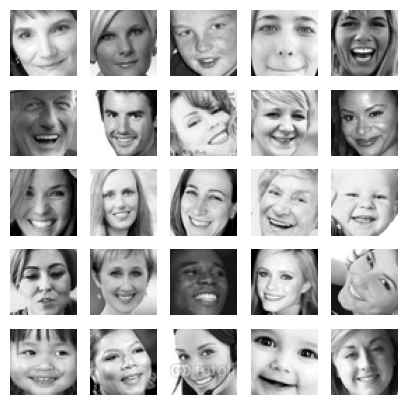

In [8]:
display_emotion('happy')

neutral:  4965


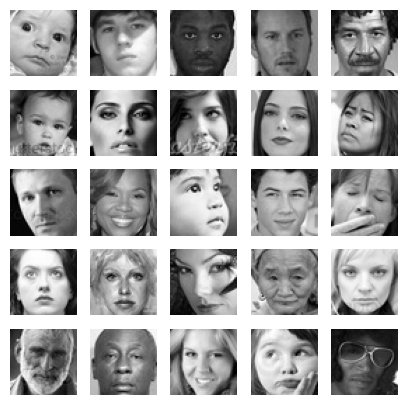

In [9]:
display_emotion('neutral')

sad:  4830


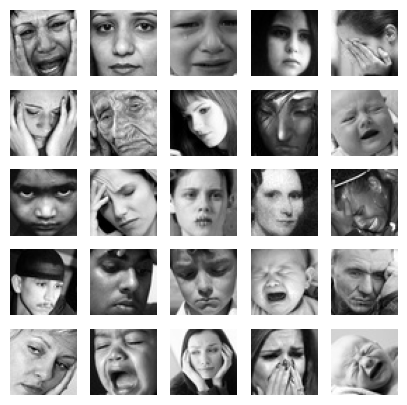

In [10]:
display_emotion('sad')

surprise:  3171


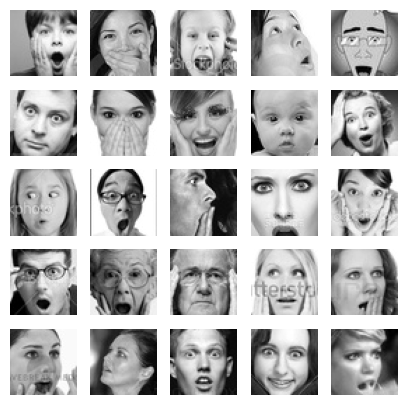

In [11]:
display_emotion('surprise')

In [12]:
data = [np.array(images['img'].values.tolist(), dtype=np.float32),
        np.array(images['type'].values.tolist(), dtype=np.uint8)]

In [13]:
gan = GAN(data)
gan.train(n_epochs=10, n_batch=128)

4/4 [==============================] - 1s 141ms/step
>1,  d1=0.679, d2=0.695 g=0.631
4/4 [==============================] - 1s 140ms/step
>2,  d1=0.575, d2=0.697 g=0.527
4/4 [==============================] - 1s 140ms/step
>3,  d1=0.493, d2=0.701 g=0.436
4/4 [==============================] - 1s 144ms/step
>4,  d1=0.407, d2=0.706 g=0.369
4/4 [==============================] - 1s 140ms/step
>5,  d1=0.326, d2=0.711 g=0.315
4/4 [==============================] - 1s 140ms/step
>6,  d1=0.231, d2=0.715 g=0.259
4/4 [==============================] - 1s 140ms/step
>7,  d1=0.173, d2=0.717 g=0.218
4/4 [==============================] - 1s 156ms/step
>8,  d1=0.129, d2=0.715 g=0.191
4/4 [==============================] - 1s 141ms/step
>9,  d1=0.083, d2=0.714 g=0.106
4/4 [==============================] - 1s 141ms/step
>10,  d1=0.070, d2=0.708 g=0.081


/Users/karladsj/Documents/Semestre I/Vision Computacional/GAN_Caras_Emociones/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 109ms/step


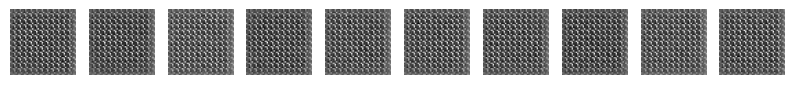

In [14]:
#types = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3,'neutral': 4, 'sad': 5, 'surprise': 6}
model = keras.models.load_model('cgan_generator.h5')

latent_points, labels = gan.generate_noise(10)
labels = np.ones(10) * 1
X = model.predict([latent_points, labels])
gan.plot_results(X, 10)


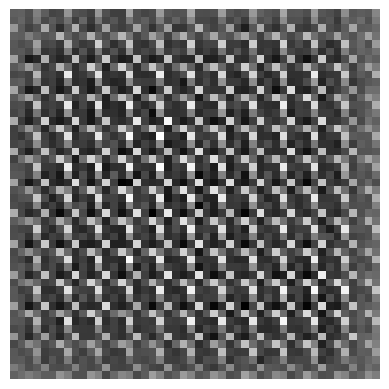

In [15]:
plt.imshow(X[0], cmap = "binary")
plt.axis("off")
plt.show()

In [21]:
m = gan.generate_noise(1)
plt.imshow(m[0], cmap = "binary")
plt.axis("off")
plt.show()

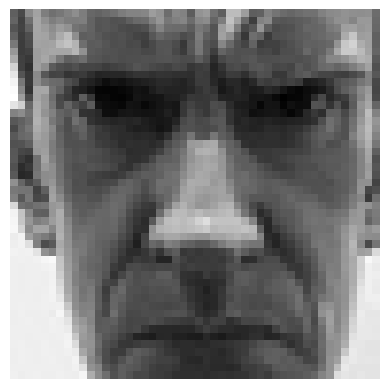

In [20]:
j = gan.get_dataset_samples(3)
plt.imshow(j[0][0][0], cmap = "gray")
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 82ms/step


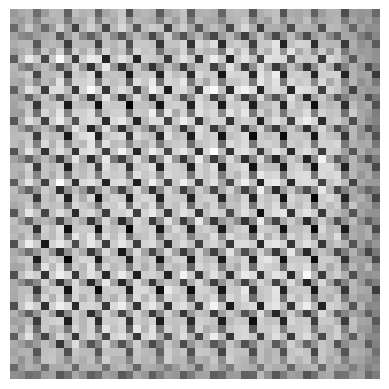

In [22]:
k = gan.generate_fake_samples(1)
plt.imshow(k[0][0][0], cmap = "gray")
plt.axis("off")
plt.show()